In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as ticker


In [2]:
customer=pd.read_csv("Customer Acqusition.csv")

In [3]:
customer

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [4]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [5]:
customer['No'].duplicated().sum()

0

In [6]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [7]:
customer['Age'].describe()

count    100.000000
mean      46.490000
std       18.282572
min       12.000000
25%       33.750000
50%       46.500000
75%       60.250000
max       79.000000
Name: Age, dtype: float64

In [8]:
customer['Product']=customer['Product'].replace('Platimum','Platinum')

In [9]:
repayment=pd.read_csv('Repayment.csv')

In [10]:
repayment.head(5)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [11]:
repayment.dtypes

SL No:        float64
Customer       object
Month          object
Amount        float64
Unnamed: 4    float64
dtype: object

In [12]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [13]:
repayment.dropna(subset='Customer',inplace=True)

In [14]:
repayment.drop(columns='Unnamed: 4',inplace=True)

In [15]:
repayment['Amount'].describe()

count      1500.000000
mean     247890.054420
std      145290.382733
min          55.860000
25%      118604.905000
50%      248008.185000
75%      367236.890000
max      499930.660000
Name: Amount, dtype: float64

In [16]:
# Replace all values in the 'SL No:' column with integers in order
repayment['SL No:'] = range(1, len(repayment) + 1)

In [17]:
repayment

,SL No:,Customer,Month,Amount
0,1,A1,12-Jan-04,495414.75
1,2,A1,3-Jan-04,245899.02
2,3,A1,15-Jan-04,259490.06
3,4,A1,25-Jan-04,437555.12
4,5,A1,17-Jan-05,165972.88
...,...,...,...,...
1495,1496,A67,9-May-05,55638.77
1496,1497,A68,10-May-06,319836.49
1497,1498,A69,11-Jul-06,247628.45
1498,1499,A70,12-Aug-05,454016.51


In [18]:
spend=pd.read_csv('spend.csv')

In [19]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [20]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [21]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [22]:
spend.duplicated().sum()

0

In [23]:
result = pd.merge(customer, spend, left_on='Customer', right_on='Customer', how='inner')

In [24]:
final_data = pd.merge(result, repayment, left_on='Sl No:', right_on='SL No:', how='inner')

In [25]:
final_data

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Customer_y,Month_y,Amount_y
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,1,A1,12-Jan-04,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,2,A1,3-Jan-04,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,3,A1,15-Jan-04,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,4,A1,25-Jan-04,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,5,A1,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98,A96,25-Jan-04,310992.30
1496,97,A97,58,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,12-Jan-04,AUTO,139018.26,99,A97,12-Jan-04,121874.90
1497,98,A98,51,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,284521.06,100,A98,3-Jan-04,337815.57
1498,99,A99,35,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,90184.22,101,A99,15-Jan-04,25682.73


In [26]:
#In case age is less than 18, replace it with mean of age values
mean_age=final_data[final_data['Age']<18]['Age'].mean()
final_data['Age']=final_data['Age'].apply(lambda x:mean_age if x<18 else x)

In [27]:
#In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
final_data['Amount_x']=np.where(final_data['Amount_x']>final_data['Limit'],0.5*final_data['Limit'],
                               final_data['Amount_x'])

In [28]:
final_data[final_data['Sl No:']==104]

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Customer_y,Month_y,Amount_y
18,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,104,3-Jan-04,RENTAL,50000.0,104,A2,3-Jan-04,185955.07


In [29]:
# Incase the repayment amount is more than the limit, replace the repayment with the 
#limit.
final_data['Amount_y']=np.where(final_data['Amount_y']>final_data['Limit'],final_data['Limit'],final_data['Amount_y'])

In [30]:
final_data

,No,Customer_x,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,SL No:,Customer_y,Month_y,Amount_y
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,12-Jan-04,JEWELLERY,485470.80,1,A1,12-Jan-04,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,3-Jan-04,PETRO,410556.13,2,A1,3-Jan-04,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,15-Jan-04,CLOTHES,23740.46,3,A1,15-Jan-04,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,25-Jan-04,FOOD,484342.47,4,A1,25-Jan-04,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,17-Jan-05,CAMERA,369694.07,5,A1,17-Jan-05,165972.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,25-Jan-04,BIKE,54729.66,98,A96,25-Jan-04,100000.00
1496,97,A97,58.0,TRIVANDRUM,Platinum,10000.0,C20,Govt,99,12-Jan-04,AUTO,5000.00,99,A97,12-Jan-04,10000.00
1497,98,A98,51.0,CALCUTTA,Platinum,10001.0,C21,Normal Salary,100,3-Jan-04,SHOPPING,5000.50,100,A98,3-Jan-04,10001.00
1498,99,A99,35.0,CALCUTTA,Platinum,10002.0,C22,Self Employed,101,15-Jan-04,AIR TICKET,5001.00,101,A99,15-Jan-04,10002.00


In [31]:
# How many distinct customers
customer['Customer'].nunique()

100

In [32]:
# What is the average monthly spend by customers
final_data['Month_x']=pd.to_datetime(final_data['Month_x'],format='%d-%b-%y')

In [33]:
final_data['Month_y']=pd.to_datetime(final_data['Month_y'],format='%d-%b-%y')

In [34]:
final_data['Month'] = final_data['Month_x'].dt.month  # Format as 'YYYY-MM'
# Group by customer and month
average_monthly_spend = final_data.groupby(['Customer_x', 'Month'])['Amount_x'].mean()
# Unstack to pivot 'Month' into columns
average_monthly_spend = average_monthly_spend.unstack(level='Month').fillna(0)

# Display result
average_monthly_spend.astype(int)

Month,1,2,3,4,5,6,7,8,9,10,11,12
Customer_x,,,,,,,,,,,,
A1,372762,175235,0,261649,361141,0,0,344372,0,244534,183839,0
A10,161144,194557,134631,270721,189207,0,239798,454827,0,0,459690,0
A100,50000,0,0,0,0,0,0,0,0,0,0,0
A11,130298,237842,177102,483603,323982,283779,0,404113,67560,0,472854,0
A12,343885,175938,210351,203568,305626,227499,77725,319708,479627,446841,383087,0
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,240401,0,0,0,0,0,0,0,0,0,0,0
A96,54729,0,0,0,0,0,0,0,0,0,0,0
A97,5000,0,0,0,0,0,0,0,0,0,0,0


In [35]:
# Method2
final_data['Month'] = final_data['Month_x'].dt.month  # Format as 'YYYY-MM'

# Group by customer and month
average_monthly_spend = final_data.groupby(['Customer_x', 'Month'])['Amount_x'].mean().reset_index()

# Pivot the DataFrame to get 'Month' as columns
pivoted_data = average_monthly_spend.pivot(index='Customer_x', columns='Month', values='Amount_x')

# Fill missing values with 0 and convert to integers
pivoted_data = pivoted_data.fillna(0).astype(int)

# Display the result
pivoted_data


Month,1,2,3,4,5,6,7,8,9,10,11,12
Customer_x,,,,,,,,,,,,
A1,372762,175235,0,261649,361141,0,0,344372,0,244534,183839,0
A10,161144,194557,134631,270721,189207,0,239798,454827,0,0,459690,0
A100,50000,0,0,0,0,0,0,0,0,0,0,0
A11,130298,237842,177102,483603,323982,283779,0,404113,67560,0,472854,0
A12,343885,175938,210351,203568,305626,227499,77725,319708,479627,446841,383087,0
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,240401,0,0,0,0,0,0,0,0,0,0,0
A96,54729,0,0,0,0,0,0,0,0,0,0,0
A97,5000,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Avg monthly repayment by customer

grouped_data=final_data.groupby(['Customer_x','Month'])['Amount_y'].mean()
pivot_data=grouped_data.unstack(level='Month').fillna(0).astype(int)
pivot_data

Month,1,2,3,4,5,6,7,8,9,10,11,12
Customer_x,,,,,,,,,,,,
A1,340554,227451,0,88259,187398,0,0,169358,0,297176,402099,0
A10,426652,208015,146922,211299,102337,0,358194,160893,0,0,3121,0
A100,69551,0,0,0,0,0,0,0,0,0,0,0
A11,381231,289250,194893,442370,381322,241328,0,332677,288831,0,116375,0
A12,275945,229312,242112,258714,217261,320743,450664,358958,289407,198563,429751,0
...,...,...,...,...,...,...,...,...,...,...,...,...
A95,369405,0,0,0,0,0,0,0,0,0,0,0
A96,100000,0,0,0,0,0,0,0,0,0,0,0
A97,10000,0,0,0,0,0,0,0,0,0,0,0


In [37]:
# monthly profit
final_data['Monthly_profit']=final_data['Amount_y']-final_data['Amount_x']
filtered_df=final_data[final_data['Monthly_profit']>0]
grouped_data=filtered_df.groupby('Month')['Monthly_profit'].sum()*0.029
grouped_data.astype(int)

Month
1     558292
2     486756
3     357319
4     247621
5     351343
6      80955
7      43624
8      57713
9      73458
10     64841
11    126303
12     62649
Name: Monthly_profit, dtype: int32

In [38]:
# Top 5 product types
final_data['Type'].value_counts()[:5]

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

In [39]:
# city with maximum spend

final_data.groupby('City')['Amount_x'].sum().idxmax()

'COCHIN'

In [40]:

# Define the age groups
bins = [0, 20, 30, 40, 50, 60, 70, 120]
labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Create a new column 'age_group' in the dataframe
final_data['age_group'] = pd.cut(final_data['Age'], bins=bins, labels=labels, right=False)

# Group by 'age_group' and calculate the sum of 'spend_amount'
age_group_spend = final_data.groupby('age_group',observed=True)['Amount_x'].sum()

# Get the age group with maximum spend
max_spend_age_group = age_group_spend.idxmax()

print(f"The age group that spends the most is {max_spend_age_group}")


The age group that spends the most is 20-29


In [41]:
#Top 10 customers by repayment amount
v1 = final_data.groupby('Customer_x')['Amount_y'].sum().sort_values(ascending=False)
formatted_v1 = v1[:10].apply(lambda x: f"{x:,.0f}")  # Formats the numbers with commas and 2 decimal places
print(formatted_v1)


Customer_x
A61    10,539,143
A60     9,876,291
A13     9,572,001
A43     8,489,871
A45     8,448,335
A12     8,334,760
A14     7,943,269
A44     7,744,730
A39     7,622,483
A42     7,615,461
Name: Amount_y, dtype: object


In [42]:
#Calculate the city wise spend on each product on yearly basis. Also include a graphical 
#representation for the same
final_data['spend_year']=final_data['Month_x'].dt.year
grouped_data=final_data.groupby(['spend_year','Product','City'])['Amount_x'].sum()
pivoted_data=grouped_data.unstack(level='City').fillna(0)
pivoted_data.map(lambda x: f"{x:,.0f}")

City                  BANGALORE     BOMBAY    CALCUTTA    CHENNAI      COCHIN  \
spend_year Product                                                              
2004       Gold       9,289,879  6,987,854   7,477,141  1,059,618   7,315,850   
           Platinum   1,112,732    897,265   2,037,690  3,535,652   3,419,904   
           Silver     1,291,853    532,089     500,006    282,057     814,230   
2005       Gold      12,892,363  8,983,018  10,303,356  3,740,946  12,110,613   
           Platinum     912,285    711,805   4,434,696  5,053,956   4,960,922   
           Silver       830,612    508,989     440,147    377,184     652,269   
2006       Gold      12,030,611  7,917,144  11,167,533  2,704,289  10,499,142   
           Platinum     685,831    972,130   3,589,607  5,024,923   4,920,592   
           Silver     1,415,481  1,092,834   1,157,956    350,010   1,269,991   

City                     DELHI      PATNA TRIVANDRUM  
spend_year Product                                    
2004       Gold      2,806,495  2,072,568  2,415,103  
           Platinum    283,513  1,113,070  2,161,677  
           Silver      768,172    756,684    209,667  
2005       Gold      1,964,845  3,252,616  1,240,376  
           Platinum    494,158  2,883,231  3,601,443  
           Silver      612,311    950,094    269,913  
2006       Gold      2,957,103  2,276,182  2,735,711  
           Platinum    176,789  1,256,138  2,147,404  
           Silver      854,900    700,005    555,862

In [43]:
grouped_data

spend_year  Product  City      
2004        Gold     BANGALORE     9289878.54
                     BOMBAY        6987853.53
                     CALCUTTA      7477140.98
                     CHENNAI       1059618.50
                     COCHIN        7315850.15
                                      ...    
2006        Silver   CHENNAI        350009.50
                     COCHIN        1269990.87
                     DELHI          854899.97
                     PATNA          700005.00
                     TRIVANDRUM     555862.12
Name: Amount_x, Length: 72, dtype: float64

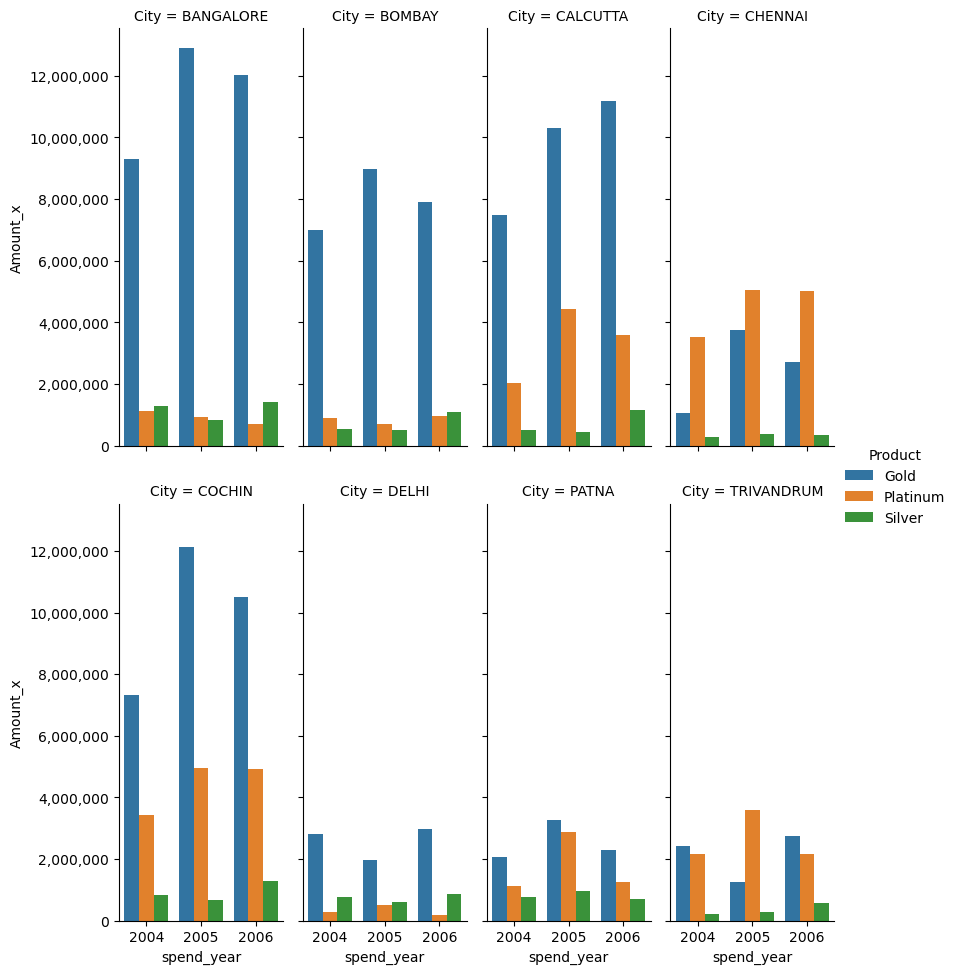

In [44]:
data=grouped_data.reset_index()
graph=sns.catplot(x='spend_year',y='Amount_x',hue='Product',col='City',col_wrap=4,data=data,kind='bar',aspect=.4)

# Define the formatter for large numbers
formatter = ticker.FuncFormatter(lambda x,_: f'{x:,.0f}')

# Apply the formatter to the shared y-axis
graph.axes[0].yaxis.set_major_formatter(formatter)

# Show the plot
plt.show()

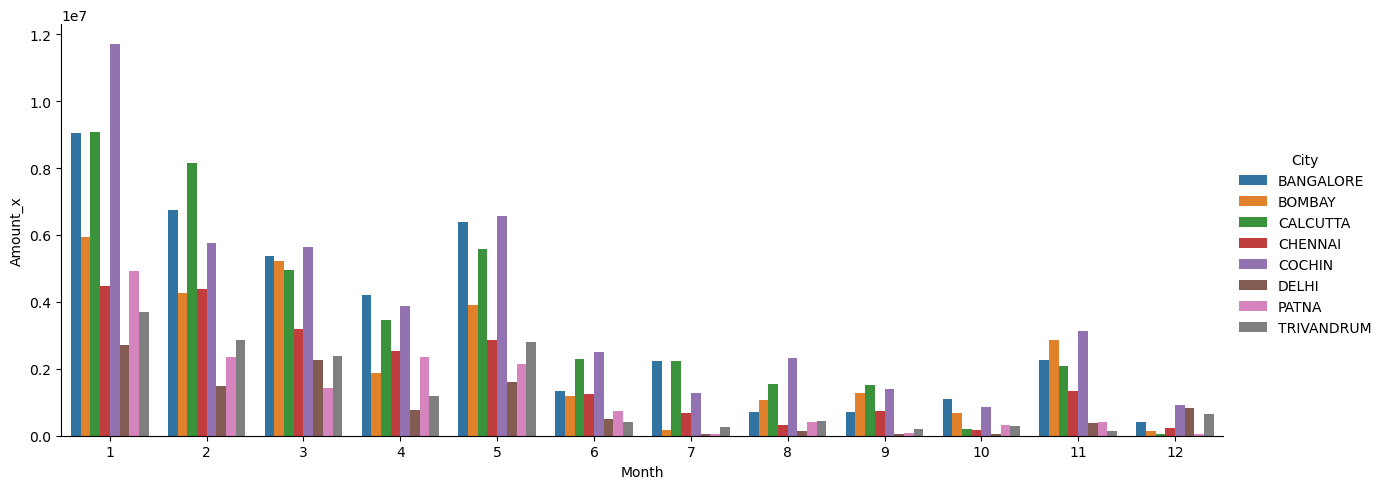

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped data preparation
grouped_data = final_data.groupby(['Month', 'City'])['Amount_x'].sum()
data = grouped_data.reset_index()

# Create catplot with shared axes disabled
graph = sns.catplot(
    x='Month',
    y='Amount_x',
    hue='City',
    data=data,
    kind='bar',
    aspect=2.5
)

# Show the plot
plt.show()


In [46]:
final_data.rename(columns={'Month':'Spend_month'},inplace=True)

C:\Users\Joyal\AppData\Local\Temp\ipykernel_9480\2904313512.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for ax,(group_name,group_data) in zip(axes,data.groupby('grouped')):


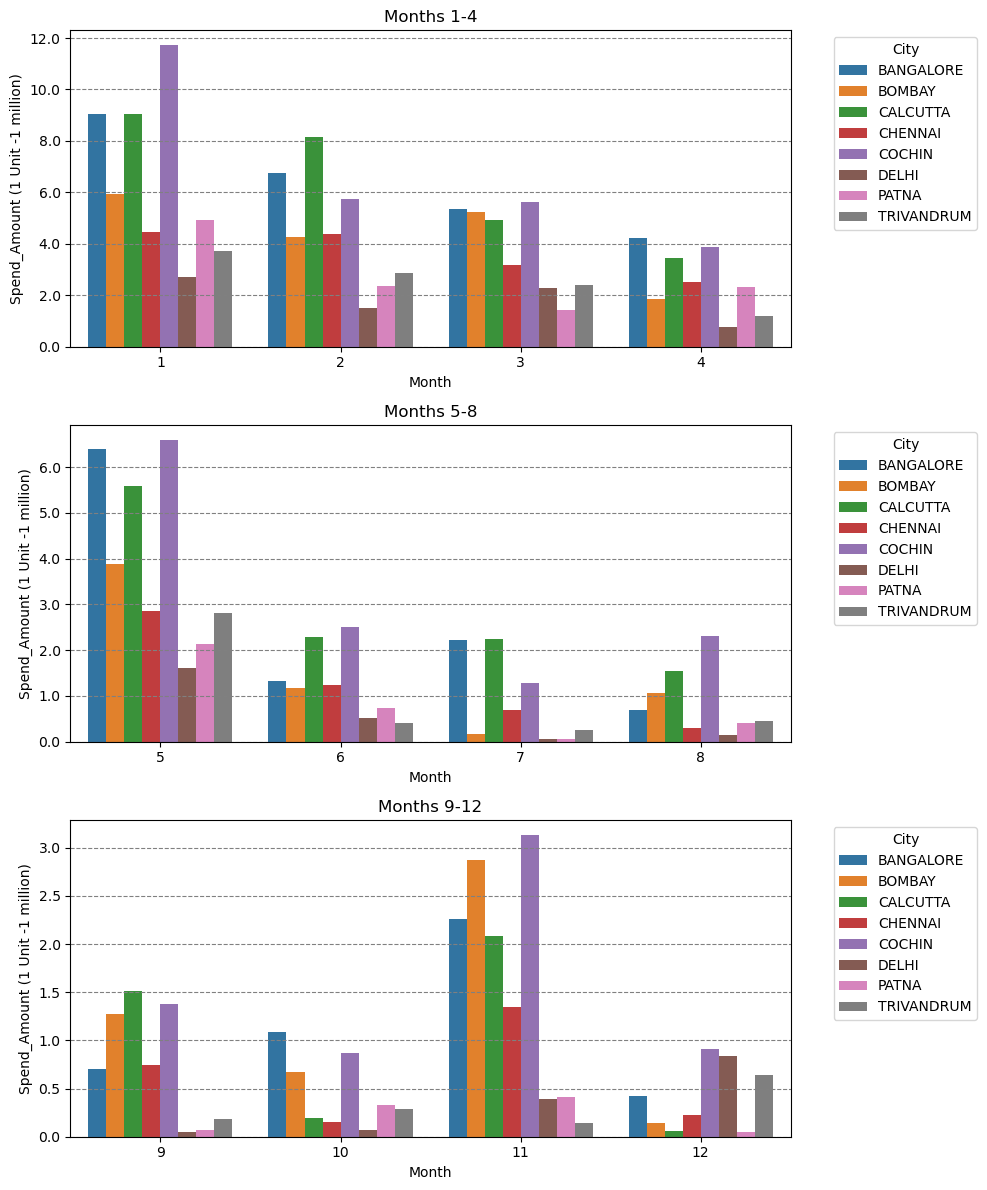

In [47]:
grouped_data=final_data.groupby(['Spend_month','City'])['Amount_x'].sum()
data=grouped_data.reset_index()

fig,axes = plt.subplots(3,1,figsize=(10,12))

# split data into groups
data['grouped']=pd.cut(data['Spend_month'],bins=[0,4,8,12],labels=['Months 1-4','Months 5-8','Months 9-12' ])
formatter=ticker.FuncFormatter(lambda x,_: f'{x/1e6:,.1f}')

for ax,(group_name,group_data) in zip(axes,data.groupby('grouped')):
    sns.barplot(x='Spend_month',y='Amount_x',hue='City',data=group_data,ax=ax)
    ax.set_title(f'{group_name}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Spend_Amount (1 Unit -1 million)')
    ax.yaxis.set_major_formatter(formatter)
    ax.grid(color='grey',linestyle='--',axis='y')
    ax.legend(title='City',bbox_to_anchor=(1.05,1),loc='upper left')

plt.tight_layout()
plt.show()
    


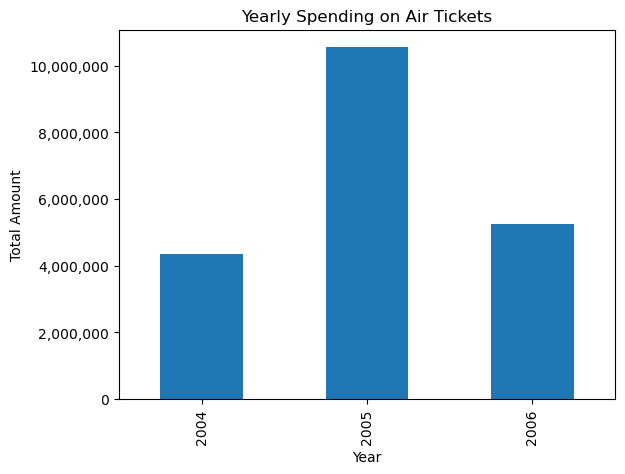

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter data for 'AIR TICKET'
filtered_data = final_data[final_data['Type'] == 'AIR TICKET']

# Group and sum the 'Amount_x' by 'spend_year'
grouped_data = filtered_data.groupby('spend_year')['Amount_x'].sum()

# Use Pandas plotting
ax = grouped_data.plot(kind='bar', xlabel='Year', ylabel='Total Amount', title='Yearly Spending on Air Tickets')

# Format y-axis to show whole numbers
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.show()


In [49]:
#Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

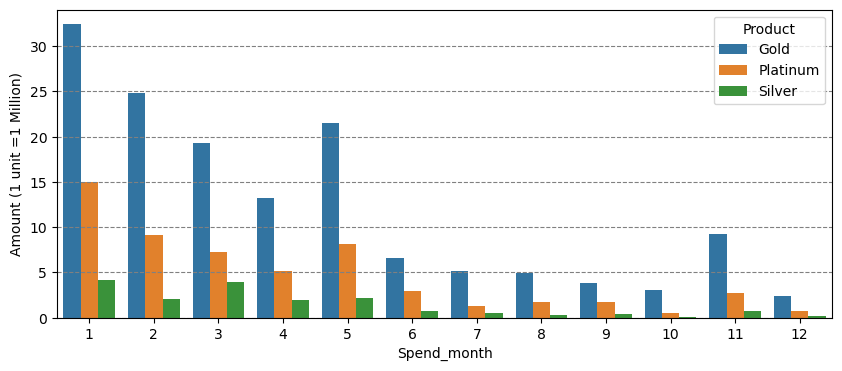

In [50]:
grouped_data=final_data.groupby(['Spend_month','Product'])['Amount_x'].sum()
data=grouped_data.reset_index()
plt.figure(figsize=(10,4))
ax=sns.barplot(x='Spend_month',y='Amount_x',hue='Product',data=data)
formatter=ticker.FuncFormatter(lambda x,_:f'{x/1e6:,.0f}')
plt.grid(color='grey',axis='y',linestyle='--')
ax.yaxis.set_major_formatter(formatter)
plt.ylabel('Amount (1 unit =1 Million)')
plt.show()

In [51]:
final_data['repayment year']=final_data['']

KeyError: ''

In [53]:
final_data['repayment_year']=final_data['Month_y'].dt.year

In [54]:
final_data['repayment_month']=final_data['Month_y'].dt.month

In [90]:
def top3(Product_name,timeperiod):
    df1=final_data[final_data['Product']==Product_name]
    if timeperiod =='Year':
        df2=df1.groupby(['repayment_year','City','Customer_x'])['Amount_y'].sum()
        df2=df2.reset_index()
        df2=df2.sort_values(['repayment_year','City','Amount_y'],ascending=[True,True,False])
        df2['rank']=df2.groupby(['repayment_year','City'])['Amount_y'].rank(method='first',ascending=False)
        top_customers=df2[df2['rank']<=3]
        print(top_customers.reset_index(drop=True))
    elif timeperiod=='Month':
        df2=df1.groupby(['repayment_month','City','Customer_x'])['Amount_y'].sum()
        df2=df2.reset_index()
        df2=df2.sort_values(['repayment_month','City','Amount_y'],ascending=[True,True,False])
        df2['rank']=df2.groupby(['repayment_month','City'])['Amount_y'].rank(method='first',ascending=False)
        top_customers=df2[df2['rank']<=3]
        print(top_customers.reset_index(drop=True))
    else:
        print("Invalid entry")


In [92]:
top3('Gold','Year')

    repayment_year        City Customer_x    Amount_y  rank
0             2004   BANGALORE        A14  2770261.30   1.0
1             2004   BANGALORE         A1  2359797.84   2.0
2             2004   BANGALORE        A13  2337012.77   3.0
3             2004      BOMBAY        A42  3045914.71   1.0
4             2004      BOMBAY        A12  2339080.90   2.0
5             2004      BOMBAY        A62  1744114.25   3.0
6             2004    CALCUTTA        A60  2890721.81   1.0
7             2004    CALCUTTA        A29  1376793.94   2.0
8             2004    CALCUTTA        A15  1051502.61   3.0
9             2004     CHENNAI        A27  1842823.04   1.0
10            2004     CHENNAI        A67    67845.60   2.0
11            2004      COCHIN        A45  2557947.39   1.0
12            2004      COCHIN        A61  2518154.95   2.0
13            2004      COCHIN        A16  1122211.16   3.0
14            2004       DELHI        A44  2149383.50   1.0
15            2004       DELHI        A9